## Force Memory Analysis

The force correlations at a given $\tau$ between all trajectories at a position in time are expressed with:

$$
\begin{align}
C_\tau(t) = \left<\delta f_c(t)\delta f_c(\tau)\right>_\text{N}
\end{align}
$$
with $\left<...\right>$ the mean over all trajectories and $\delta f_c(t)=f_c(t)-\left<f_c(t)\right>_N$ the constraint force $f_c$ at a given point in time $t$ minus the average of all constraint forces at that time point.

ToDo @Steffen: add for what this analaysis can be used

We start by introducing the general concept with dummy sinoid data and continue with real trajectories.

### Sinoid Data

In [1]:

import numpy as np
import matplotlib.pyplot as plt

N = 100  # number of trajectories
length_data = 3500  # nuber of time steps

# create a mock delta_force_array with sine functions:
force_array = np.array([
    np.sin(np.linspace(0, 2 * np.pi, length_data) + phase)
    for phase in np.linspace(0, 0.5 * np.pi, N)
])

print(force_array.shape)
force_mean = np.mean(force_array, axis=0)

# calculate $\delta f(t) = f(t) - \left< f(t) \right>_N$
delta_force_array = force_array - force_mean



(100, 3500)


plot example force data

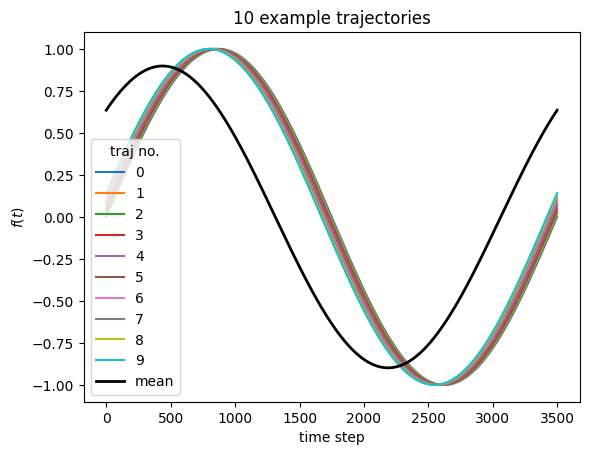

In [2]:
x = np.linspace(0, 3.5-0.001, length_data)

fig, ax = plt.subplots()
for n in range(10):
    ax.plot(force_array[n], label=f'{n}')
ax.set(
    xlabel='time step',
    ylabel=r'$f(t)$',
    title='10 example trajectories'
)
ax.plot(force_mean, color='black', linewidth=2, label='mean')
plt.legend(title='traj no.')
plt.show()



plot $\delta f(t)$

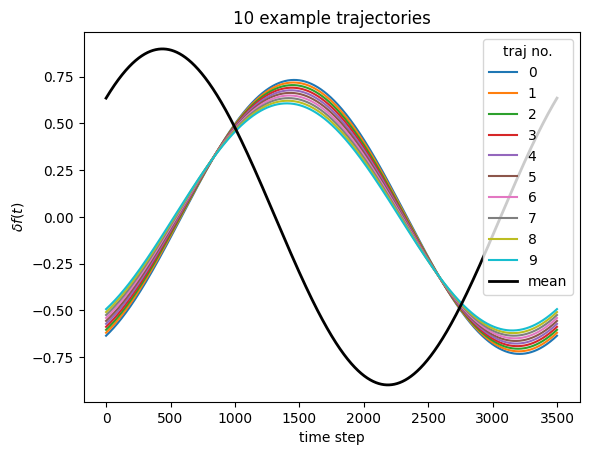

In [3]:
fig, ax = plt.subplots()
for n in range(10):
    ax.plot(delta_force_array[n], label=f'{n}')
ax.plot(force_mean, color='black', linewidth=2, label='mean')
ax.set(
    xlabel='time step',
    ylabel=r'$\delta f(t)$',
    title='10 example trajectories'
)
plt.legend(title='traj no.')
plt.show()

calculate memory at a given time index using the kernel_at_ndx function

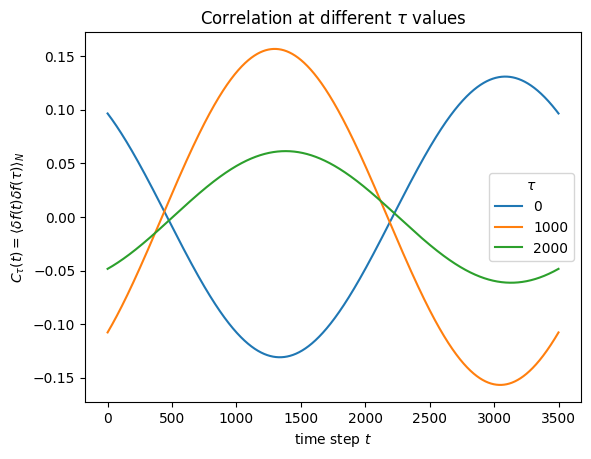

In [4]:
from dcTMD.dcTMD import ForceEstimator as fe

t_ndx_list = [0, 1000, 2000]
correlation_array = np.zeros((len(t_ndx_list), length_data))
for i, t_ndx in enumerate(t_ndx_list):
    correlation_array[i] = fe.kernel_at_ndx(delta_force_array, t_ndx)

fig, ax = plt.subplots()
for i in range(len(t_ndx_list)):
    ax.plot(correlation_array[i], label=t_ndx_list[i])
ax.set(
    xlabel=r'time step $t$',
    ylabel=r'$C_{\tau}(t) = \left\langle\delta f(t)\delta f(\tau)\right\rangle_N$',
    title=r'Correlation at different $\tau$ values'
)
plt.legend(title=r'$\tau$')
plt.show()


### Trajectory Data:

This analysis is usually done in addition to the $\Delta G$ and $\Gamma$ evaluation based on the ForceEstimator class. If you have read [dcTMD via Force](force.ipynb) you can skip the steps 0 and 1. 

### 0. load packages and define variables

In [5]:
import numpy as np
from dcTMD.dcTMD import ForceEstimator
from dcTMD.storing import ForceSet
import dcTMD

In [6]:
# define variables
velocity = 0.001
res = 10
verbose = True
temperature = 300

### 1. create a forceset instance 
To calculate free energy and friction estimates a forceset containing all the force time traces is needed.

#### I. an array containing the filenames is generated.
This can be done via the function dcTMD.io.load_pullf() which takes either a glob pattern or a file containing the pullf file names as argument.

In [7]:
# if the filesnames are stored in a file
pullf_files = '../../tests/testdata/pullf_filenames.dat'
# using a glob pattern / wildcard
pullf_files = '../../tests/testdata/*pullf.xvg'
# loading the filenames
filenames = dcTMD.io.load_pullf(pullf_files)

print(filenames)


file ../../tests/testdata/*pullf.xvg not found. using glob.glob(../../tests/testdata/*pullf.xvg)
['../../tests/testdata/t_middle_16_pullf.xvg', '../../tests/testdata/t_middle_26_pullf.xvg', '../../tests/testdata/t_middle_29_pullf.xvg', '../../tests/testdata/t_middle_32_pullf.xvg', '../../tests/testdata/t_middle_19_pullf.xvg', '../../tests/testdata/t_middle_03_pullf.xvg', '../../tests/testdata/t_middle_04_pullf.xvg', '../../tests/testdata/t_middle_05_pullf.xvg', '../../tests/testdata/t_middle_25_pullf.xvg', '../../tests/testdata/t_middle_31_pullf.xvg', '../../tests/testdata/t_middle_21_pullf.xvg', '../../tests/testdata/t_middle_17_pullf.xvg', '../../tests/testdata/t_middle_24_pullf.xvg', '../../tests/testdata/t_middle_09_pullf.xvg', '../../tests/testdata/t_middle_28_pullf.xvg', '../../tests/testdata/t_middle_30_pullf.xvg', '../../tests/testdata/t_middle_34_pullf.xvg', '../../tests/testdata/t_middle_01_pullf.xvg']


#### II. the forceset is created
by creating a ForceSet instance which is fitted with the filenames. 

In [8]:
# create ForceSet instance
forceset = ForceSet(velocity=velocity,
                  resolution=res,
                  verbose=verbose,
                  )
# fit/fill workset
forceset.fit(filenames)



Using ../../tests/testdata/t_middle_16_pullf.xvg to initialize arrays.
length of pullf file is 20001
reduced length is 2001


Loading force files:  56%|█████▌    | 10/18 [00:00<00:00, 97.18it/s]

Reading file ../../tests/testdata/t_middle_16_pullf.xvg
Reading file ../../tests/testdata/t_middle_26_pullf.xvg
Reading file ../../tests/testdata/t_middle_29_pullf.xvg
Reading file ../../tests/testdata/t_middle_32_pullf.xvg
Reading file ../../tests/testdata/t_middle_19_pullf.xvg
Reading file ../../tests/testdata/t_middle_03_pullf.xvg
Reading file ../../tests/testdata/t_middle_04_pullf.xvg
Reading file ../../tests/testdata/t_middle_05_pullf.xvg
Reading file ../../tests/testdata/t_middle_25_pullf.xvg
Reading file ../../tests/testdata/t_middle_31_pullf.xvg
Reading file ../../tests/testdata/t_middle_21_pullf.xvg
Reading file ../../tests/testdata/t_middle_17_pullf.xvg
Reading file ../../tests/testdata/t_middle_24_pullf.xvg
Reading file ../../tests/testdata/t_middle_09_pullf.xvg
Reading file ../../tests/testdata/t_middle_28_pullf.xvg
Reading file ../../tests/testdata/t_middle_30_pullf.xvg
Reading file ../../tests/testdata/t_middle_34_pullf.xvg
Reading file ../../tests/testdata/t_middle_01_pu

Loading force files: 100%|██████████| 18/18 [00:00<00:00, 101.33it/s]


ForceSet(resolution=10, velocity=0.001, verbose=True)

### III. derive estimates from the forceset

1. instantiate a ForceEstimator instance
2. fit ForceEstimator instance with previously created forceset

When the ForceEstimator is fit with the forceset the delta_force_array is created

In [9]:
forceestimator = ForceEstimator(temperature)
forceestimator.fit(forceset)
vars(forceestimator)

{'temperature': 300,
 'verbose': False,
 'force_set': ForceSet(resolution=10, velocity=0.001, verbose=True),
 'names_': array(['t_middle_16_pullf.xvg', 't_middle_26_pullf.xvg',
        't_middle_29_pullf.xvg', 't_middle_32_pullf.xvg',
        't_middle_19_pullf.xvg', 't_middle_03_pullf.xvg',
        't_middle_04_pullf.xvg', 't_middle_05_pullf.xvg',
        't_middle_25_pullf.xvg', 't_middle_31_pullf.xvg',
        't_middle_21_pullf.xvg', 't_middle_17_pullf.xvg',
        't_middle_24_pullf.xvg', 't_middle_09_pullf.xvg',
        't_middle_28_pullf.xvg', 't_middle_30_pullf.xvg',
        't_middle_34_pullf.xvg', 't_middle_01_pullf.xvg'], dtype='<U32'),
 'delta_force_array': array([[ -522.42118333, -2378.93973333,   633.71216667, ...,
          1499.32438889,    69.02975556,  2283.61911111],
        [ 2488.41481667, -2751.03973333,  -922.63583333, ...,
          1105.01438889,  1294.69275556,  1361.89911111],
        [-1194.77918333,   -36.94853333,  1910.80916667, ...,
           974.07438

There are two options for the time steps at which the correlation is calculated.
1. specify the indices of the time steps with index
2. calculate the correlation every ndx_striding time steps

CAUTION: calculating the correlations is very memory consuming.

In [10]:
index = np.array((0, 1000, 2000))
correlation_at_given_ndx = forceestimator.memory_kernel(index=index)

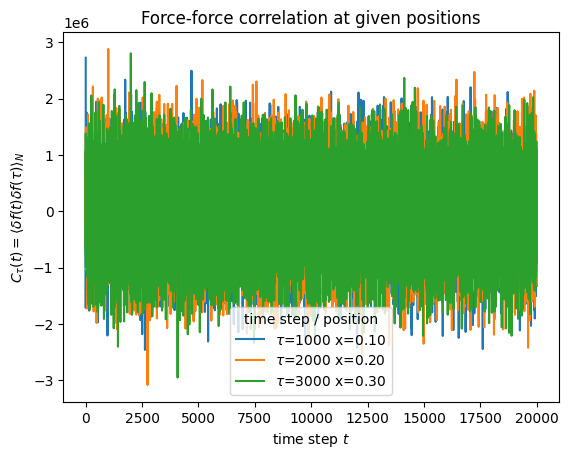

In [ ]:
fig, ax = plt.subplots()
for (c, n) in zip(correlation_at_given_ndx, index):
    plt.plot(c, label=fr'$\tau$={n} x={forceset.position_[n]:.2f}')
plt.legend(title='time step / position')
ax.set(
    xlabel=r'time step $t$',
    ylabel=r'$C_{\tau}(t) = \left\langle\delta f(t)\delta f(\tau)\right\rangle_N$',
    title=r'Correlation at different $\tau$ values/positions'
)
#plt.savefig('forceforce_correlation_2dplot.png', dpi=300)
plt.show()

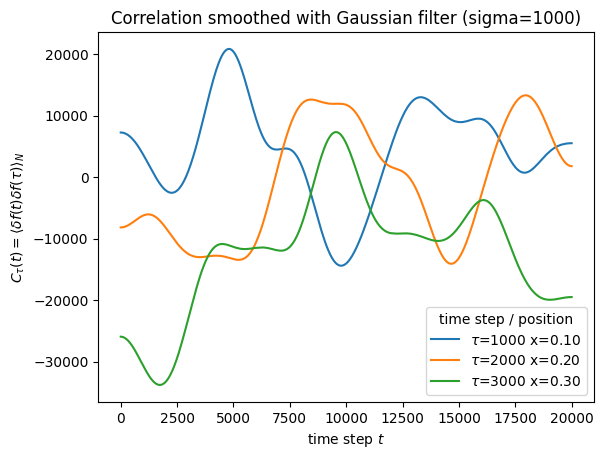

In [22]:
from scipy.ndimage import gaussian_filter1d

fig, ax = plt.subplots()
for (c, n) in zip(correlation_at_given_ndx, index):
    data = gaussian_filter1d(c, sigma=1000)
    plt.plot(data, label=fr'$\tau$={n} x={forceset.position_[n]:.2f}')
plt.legend(title='time step / position')
#plt.savefig('forceforce_correlation_2dplot.png', dpi=300)
ax.set(
    xlabel=r'time step $t$',
    ylabel=r'$C_{\tau}(t) = \left\langle\delta f(t)\delta f(\tau)\right\rangle_N$',
    title=r'Correlation smoothed with Gaussian filter (sigma=1000)'
)
plt.show()



In [13]:
# calculate correlation every ndx_striding=1000 time steps
correlation_at_ndx_striding = forceestimator.memory_kernel(ndx_striding=1000)
index = forceestimator.memory_kernel_index_

create index with ndx_resolution


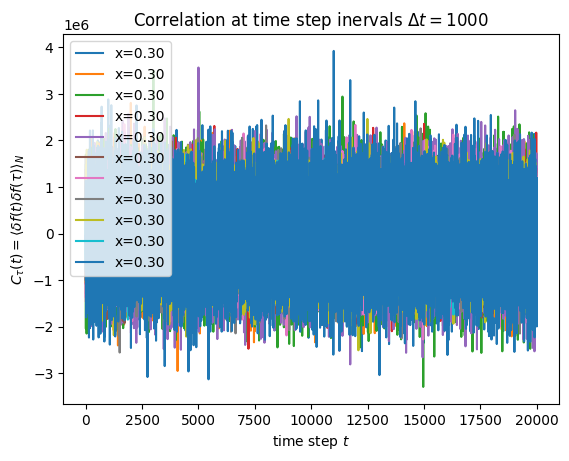

In [23]:

fig, ax = plt.subplots()
for i, (data, ndx) in enumerate(zip(correlation_at_ndx_striding, index)):
    plt.plot(data, label=f'x={forceset.position_[n]:.2f}')
    if i>=10:
        break
plt.title('Force-correlation at position/time step intervals')
plt.legend()
ax.set(
    xlabel=r'time step $t$',
    ylabel=r'$C_{\tau}(t) = \left\langle\delta f(t)\delta f(\tau)\right\rangle_N$',
    title=r'Correlation at time step inervals $\Delta t= 1000$'
)
plt.show()


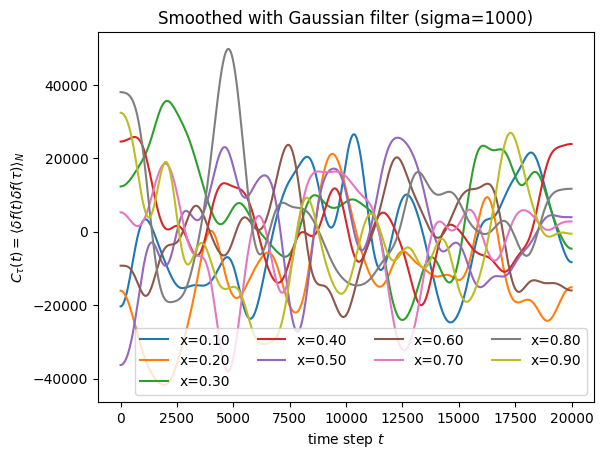

In [29]:
fig, ax = plt.subplots()
for i, (data, ndx) in enumerate(zip(correlation_at_ndx_striding, index)):
    data = gaussian_filter1d(data, sigma=500)
    plt.plot(data, label=f'x={forceset.position_[ndx]:.2f}')
    if i>=8:
        break
plt.legend(loc='lower right', ncol=4)
ax.set(
    xlabel=r'time step $t$',
    ylabel=r'$C_{\tau}(t) = \left\langle\delta f(t)\delta f(\tau)\right\rangle_N$',
    title='Smoothed with Gaussian filter (sigma=1000)'
)
plt.show()

#### 3D plots
The function forceforce_correlation_3dplot creates a 3D plot to visualize the correlation between forces over time. It allows for optional smoothing and can display specific positions on the z-axis. The plot is labeled for clarity, making it easier to understand the data being represented.

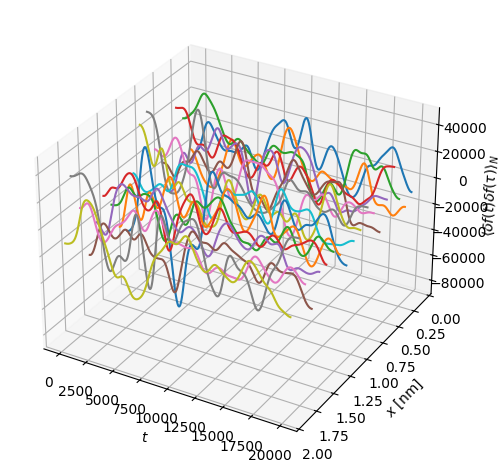

In [16]:
# create a 3D plot with the lag time on the x axis
def forceforce_correlation_3dplot(index, correlation_set, position=None, smoothing=None, addplane=False):
    """
    Create a 3D plot of the force-force correlation function.
    Parameters
    ----------
    index :
        Indices at which the correlation is calculated.
    correlation_set :
        shape: (len(index), length_data)
        NaN are set to zero
    """
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'lag time $\tau$')
    ax.set_zlabel(r'$\langle\delta f(t)\delta f(\tau)\rangle_N$')
    
    x_plane = np.linspace(0, len(correlation_set[0]), len(correlation_set[0]))
    y_plane = np.linspace(min(index), max(index), len(index))
    if position is not None:
        y_plane = np.linspace(
            position[min(index)],
            position[max(index)],
            len(index)
        )
    X_plane, Y_plane = np.meshgrid(x_plane, y_plane)
    Z_plane = np.zeros_like(X_plane)


    for i, ndx in enumerate(index):
        if smoothing is not None:
            x = gaussian_filter1d(correlation_set[i], sigma=smoothing)
        else:
            x = correlation_set[i]
        y = np.arange(len(x))
        if position is not None:
            z = position[ndx]
            ax.set_ylabel(r'$x$ [nm]')

        else:
            z = ndx
        ax.plot(y, x, zs=z, zdir='y', label=f'lag {ndx}')
    
    if addplane:
        # Create a semi-transparent plane at z=0
        ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.5, color='gray')
    ax.set_ylim(ax.get_ylim()[::-1])  # Reverse the y-axis limits
    
    

forceforce_correlation_3dplot(
    index,
    correlation_at_ndx_striding,
    position=forceset.position_,
    smoothing=500
)
plt.tight_layout()
plt.show()

#### Visualize results
In the package a couple of simple plot functions to get an overview of the results are implemented. e.g. plot_dcTMD_results()

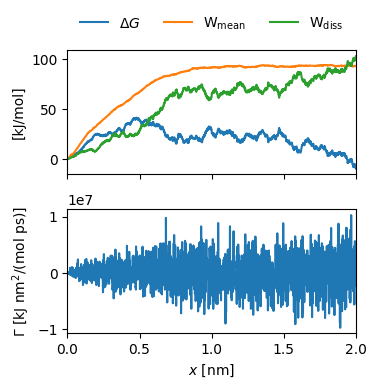

In [17]:
# plot dcTMD results
from dcTMD.utils import plotting

fig, axs = plotting.plot_dcTMD_results(forceestimator)

plt.show()

#### Smooth friction estimate
Finally, the friction estimate needs to be smoothed.
This can be done via 
dcTMD.utils.smoothing.gaussfilter_friction() or 
dcTMD.WorkEstimator.smooth_friction(sigma, mode)
sigma is the standard deviation of gaussian kernel in nm
the mode parameter determines how the input array is extended beyond its boundaries.

*Caution:* this can lead to long computations using large datasets and a big smoothing window.

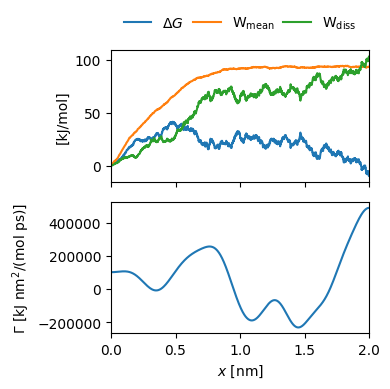

In [18]:
# smooth friction and plot results
forceestimator.smooth_friction(sigma=0.1)

# if the friction is smoothed that value is automatically plotted
fig, axs = plotting.plot_dcTMD_results(forceestimator)
plt.show()

# but one can also specify the friction
#fig, axs = plotting.plot_dcTMD_results(
#    forceestimator,
#    friction=forceestimator.friction_
#)

